# Information Theory - 23章

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, multivariate_normal, t, laplace, hypsecant, expon, gamma, invgamma, lognorm, vonmises, beta
from mpl_toolkits.mplot3d import Axes3D

# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# 正規分布

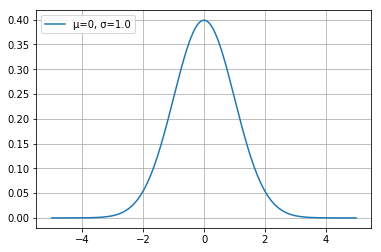

In [2]:
x = np.arange(-5., 5., 0.01)
y = norm.pdf(x)

plt.plot(x, y, label="μ=0, σ=1.0")
plt.grid()
plt.legend(loc="upper left")

plt.savefig('./dist/gaussian.png')

# 混合正規分布( 1 次元)

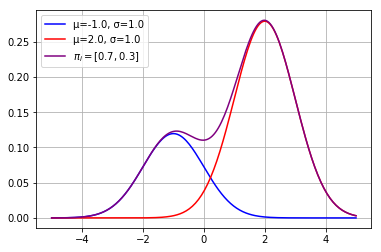

In [3]:
x = np.linspace(-5, 5,200)
pi_k = np.array([0.3,0.7])
norm1 = norm.pdf(x, -1, 1)
norm2 = norm.pdf(x, 2, 1)

plt.plot(x,pi_k[0]*norm1,color="blue",label="μ=-1.0, σ=1.0")
plt.plot(x,pi_k[1]*norm2,color="red",label="μ=2.0, σ=1.0")
plt.plot(x,pi_k[0]*norm1+pi_k[1]*norm2, color="purple",label="$\pi_i=[0.7,0.3]$")
plt.grid()
plt.legend(loc="upper left")

plt.savefig('./dist/mix-gaussian.png')

# 混合正規分布( 2 次元)

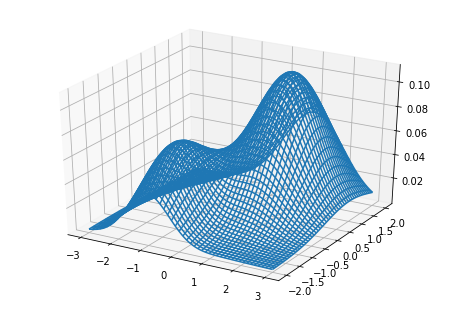

In [4]:
pi_k = np.array([0.3,0.7])
x = np.linspace(-3.0, 3.0,200)
y = np.linspace(-2.0, 2.0,200)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
Z1 = multivariate_normal([-1, -1], [[0.5, 0],[0,1]]).pdf(pos)
Z2 = multivariate_normal([1, 1], [[1, 0],[0,1]]).pdf(pos)
Z = pi_k[0]*Z1 + pi_k[1]*Z2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z)

plt.savefig('./dist/mix-gaussians-3d.png')

# Student の t 分布

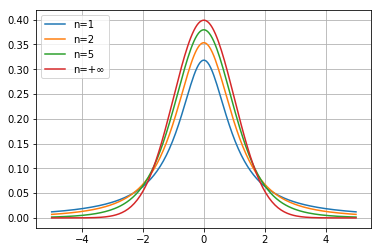

In [5]:
x = np.linspace(-5, 5,200)

plt.plot(x, t.pdf(x,1), label="n=1")
plt.plot(x, t.pdf(x,2), label="n=2")
plt.plot(x, t.pdf(x,5), label="n=5")
plt.plot(x, t.pdf(x,10**10), label="n=+∞")
plt.grid()
plt.legend(loc="upper left")

plt.savefig('./dist/student-t.png')

# ラプラス分布

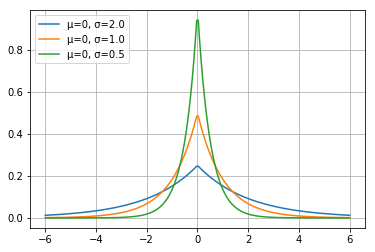

In [6]:
x = np.linspace(-6, 6,200)

plt.plot(x, laplace.pdf(x,0,2), label="μ=0, σ=2.0")
plt.plot(x, laplace.pdf(x), label="μ=0, σ=1.0")
plt.plot(x, laplace.pdf(x,0,0.5), label="μ=0, σ=0.5")
plt.grid()
plt.legend(loc="upper left")

plt.savefig('./dist/laplace.png')

# inverse-cosh 分布

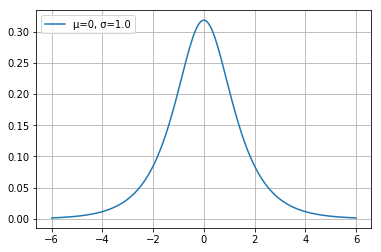

In [7]:
x = np.linspace(-6, 6,200)

plt.plot(x, hypsecant.pdf(x), label="μ=0, σ=1.0")
plt.grid()
plt.legend(loc="upper left")

plt.savefig('./dist/hypsecant.png')

# 指数分布

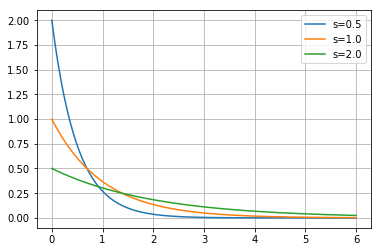

In [8]:
x = np.linspace(0, 6,200)

plt.plot(x, expon.pdf(x,0,0.5), label="s=0.5")
plt.plot(x, expon.pdf(x,0,1.0), label="s=1.0")
plt.plot(x, expon.pdf(x,0,2.0), label="s=2.0")
plt.grid()
plt.legend(loc="upper right")

plt.savefig('./dist/exponential.png')

# ガンマ分布

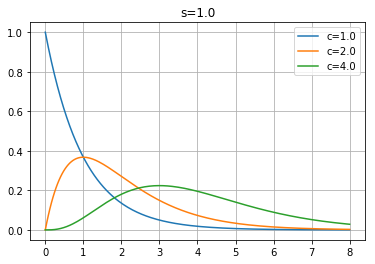

In [9]:
x = np.linspace(0, 8,200)

# plt.plot(x, gamma.pdf(x,0.5), label="c=0.5")
plt.plot(x, gamma.pdf(x,1.0), label="c=1.0")
plt.plot(x, gamma.pdf(x,2.0), label="c=2.0")
plt.plot(x, gamma.pdf(x,4.0), label="c=4.0")
plt.grid()
plt.legend(loc="upper right")
plt.title("s=1.0")

plt.savefig('./dist/gamma-c.png')

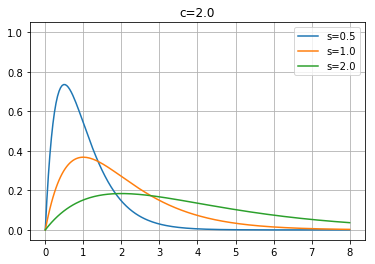

In [10]:
x = np.linspace(0, 8, 200)

plt.plot(x, gamma.pdf(x,2,0,0.5), label="s=0.5")
plt.plot(x, gamma.pdf(x,2,0,1.0), label="s=1.0")
plt.plot(x, gamma.pdf(x,2,0,2.0), label="s=2.0")
plt.grid()
plt.legend(loc="upper right")
plt.title("c=2.0")
plt.ylim([-0.05,1.05])

plt.savefig('./dist/gamma-s.png')

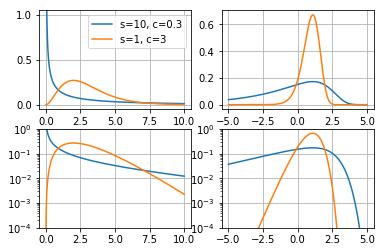

In [11]:
x = np.delete(np.linspace(0,10, 2001),0,0)
l = np.logspace(-5, 5, num=200, base=np.e)

plt.subplot(221)
plt.plot(x, gamma.pdf(x,0.3,0,10), label="s=10, c=0.3")
plt.plot(x, gamma.pdf(x,3,0,1), label="s=1, c=3")
plt.grid()
plt.ylim(-0.05,1.05)
plt.legend(loc="upper right")

plt.subplot(222)
plt.plot(np.log(l), gamma.pdf(l,0.3,0,10) * l)
plt.plot(np.log(l), gamma.pdf(l,3,0,1) * l)
plt.grid()

plt.subplot(223)
plt.plot(x, gamma.pdf(x,0.3,0,10))
plt.plot(x, gamma.pdf(x,3,0,1))
plt.yscale('log')
plt.grid()
plt.ylim(10**-4,1)

plt.subplot(224)
plt.plot(np.log(l), gamma.pdf(l,0.3,0,10) * l)
plt.plot(np.log(l), gamma.pdf(l,3,0,1) * l)
plt.yscale('log')
plt.grid()
plt.ylim(10**-4,1)

plt.savefig('./dist/gamma-l.png')

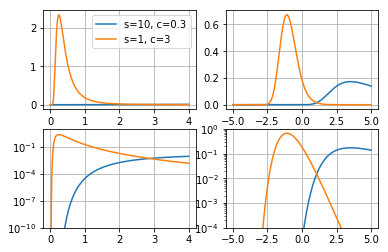

In [12]:
x = np.delete(np.linspace(0, 4, 2001),0,0)
l = np.logspace(-5, 5, num=200, base=np.e)

plt.subplot(221)
plt.plot(x, invgamma.pdf(x,0.3,0,10), label="s=10, c=0.3")
plt.plot(x, invgamma.pdf(x,3,0,1), label="s=1, c=3")
plt.grid()
#plt.ylim(-0.05,1.05)
plt.legend(loc="upper right")

plt.subplot(222)
plt.plot(np.log(l), invgamma.pdf(l,0.3,0,10) * l)
plt.plot(np.log(l), invgamma.pdf(l,3,0,1) * l)
plt.grid()

plt.subplot(223)
plt.plot(x, invgamma.pdf(x,0.3,0,10))
plt.plot(x, invgamma.pdf(x,3,0,1))
plt.yscale('log')
plt.grid()
plt.ylim(10**-10,10**1)

plt.subplot(224)
plt.plot(np.log(l), invgamma.pdf(l,0.3,0,10) * l)
plt.plot(np.log(l), invgamma.pdf(l,3,0,1) * l)
plt.yscale('log')
plt.grid()
plt.ylim(10**-4,1)

plt.show()
#plt.savefig('./dist/inverse-gamma-l.png')

# 対数正規分布

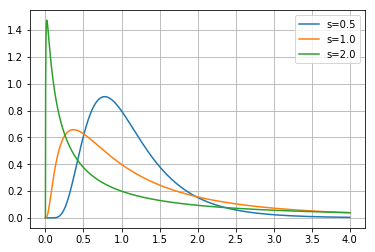

In [13]:
x = np.logspace(-20, 2, num=2000, base=2)

plt.plot(x, lognorm.pdf(x,0.5), label="s=0.5")
plt.plot(x, lognorm.pdf(x,1), label="s=1.0")
plt.plot(x, lognorm.pdf(x,2), label="s=2.0")
plt.grid()
plt.legend(loc="upper right")

plt.savefig('./dist/lognorm.png')

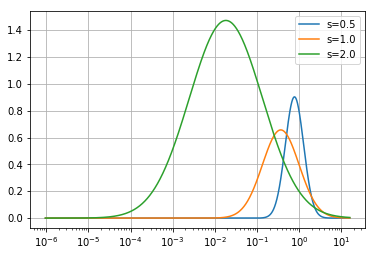

In [14]:
x = np.logspace(-20, 4, num=2000, base=2)

plt.plot(x, lognorm.pdf(x,0.5), label="s=0.5")
plt.plot(x, lognorm.pdf(x,1.0), label="s=1.0")
plt.plot(x, lognorm.pdf(x,2.0), label="s=2.0")
plt.grid()
plt.xscale('log')
plt.legend(loc="upper right")

plt.savefig('./dist/lognorm-xlog.png')

# フォン・ミーゼス分布

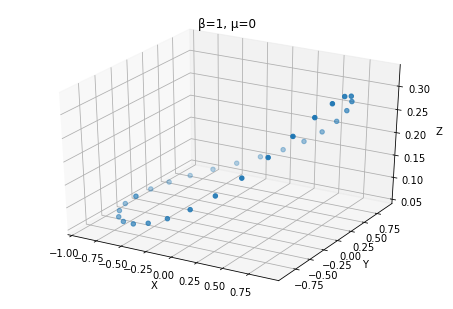

In [15]:
sita = np.linspace(-np.pi,np.pi, 30)

X = np.cos(sita)
Y = np.sin(sita)
Z = vonmises.pdf(sita, 1)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X,Y,Z)

ax.set_xlim(X.min(),X.max())
ax.set_ylim(Y.min(),Y.max())
ax.set_zlim(Z.min(),Z.max())

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title("β=1, μ=0")
plt.savefig('./dist/vomises.png')

# ベータ分布

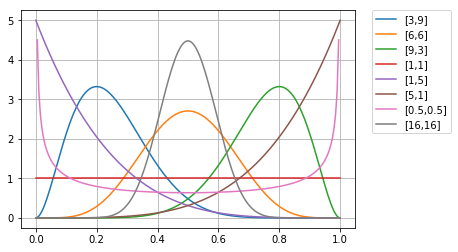

In [16]:
x = np.linspace(0, 1, 200)

plt.plot(x, beta.pdf(x,3,9), label="[3,9]")
plt.plot(x, beta.pdf(x,6,6), label="[6,6]")
plt.plot(x, beta.pdf(x,9,3), label="[9,3]")
plt.plot(x, beta.pdf(x,1,1), label="[1,1]")
plt.plot(x, beta.pdf(x,1,5), label="[1,5]")
plt.plot(x, beta.pdf(x,5,1), label="[5,1]")
plt.plot(x, beta.pdf(x,0.5,0.5), label="[0.5,0.5]")
plt.plot(x, beta.pdf(x,16,16), label="[16,16]")
plt.grid()
lgnd = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('./dist/beta.png',bbox_extra_artists=(lgnd,), bbox_inches='tight')